<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/four_emotions/image_generation_four_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 1182, done.
remote: Counting objects: 100% (450/450), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 1182 (delta 345), reused 362 (delta 278), pack-reused 732
Receiving objects: 100% (1182/1182), 145.35 MiB | 23.51 MiB/s, done.
Resolving deltas: 100% (854/854), done.


In [2]:
import sys
import os
import numpy as np
from google.colab import drive
import urllib.request

drive.mount("/content/drive")

py_file_location = "/content/FineTuning/four_emotions"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_four_emotions as txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
202761/202761 [==============================] - 0s 0us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


136824240/136824240 [==============================] - 1s 0us/step


In [3]:
### load stable diffusion class and placeholder token from textual_inversion.py
stable_diffusion = txt.stable_diffusion
placeholder_token = txt.placeholder_token

In [4]:
### for downloading weights from dropbox:
### if you want to use any other service than dropbox, change the code underneath
### Replace  and  with the ID and name of your file

### The file id is the string of characters between "s/" and the next slash "/"
### example: https://www.dropbox.com/s/28lsilu4rltrioj/LR5weightsAllEmotions30epochs.npy?dl=0
file_id = '28lsilu4rltrioj'

### name óf file
file_name = 'LR5weightsAllEmotions30epochs.npy'

url = f'https://www.dropbox.com/s/{file_id}/{file_name}?dl=1'
filename = f'{file_name}.npy'
     


In [5]:
### Download the file from the URL and save it locally
urllib.request.urlretrieve(url, filename=filename)

### Load the saved numpy file using numpy.load()
weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

In [6]:
### insert your prompt here
prompt = f"a happy {placeholder_token}."
### choose how many images should be generated
number = 1
### choose a seed
SEED = 256

In [22]:
### EITHER:
### generate images and save them directly in your Google Drive
### where to store your images, you may have to create the folder "Images" first
drive_folder = '/content/drive/MyDrive/Images/'

txt.image_generation(prompt, drive_folder, number, seed=SEED)

25/25 [==============================] - 29s 1s/step


31/31 [==============================] - 99s 3s/step


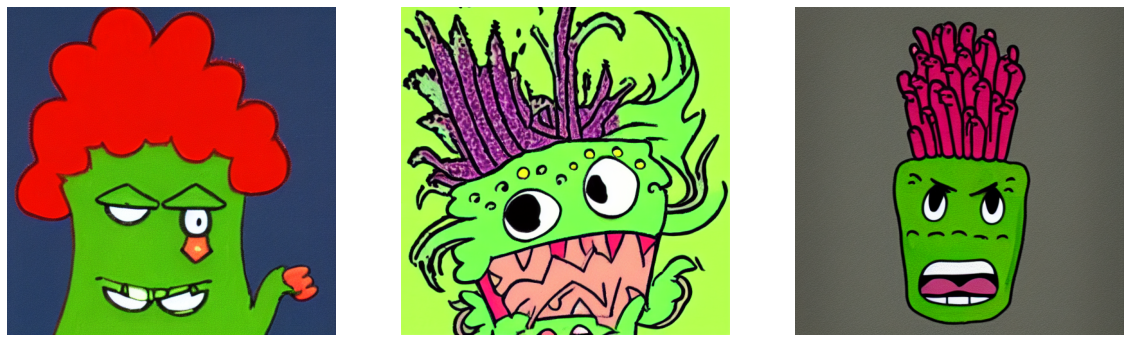

In [ ]:
### OR:
### generate images and plot them here
### change seed if you want different images with same weights
generated = stable_diffusion.text_to_image(
    prompt , batch_size=number,  num_steps=30, seed=SEED
)
txt.plot_images(generated)